In [137]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

In [138]:
labels = '02a57694o0299I 02a57694o0303I 02a57694o0307I 02a57694o0319I 02a57694o0323I 02a57694o0327I 02a57694o0339I 02a57694o0343I 02a57694o0347I'.split()
analysis_name = '_'.join([l.split('o')[1] for l in labels])

run = 'ATLAS_mwa57694_rereduction'
analysis_root = '/Volumes/abraham/xcor_data/analysis/'+run+'/' + analysis_name + '/'

In [139]:
img_fits_path = analysis_root+analysis_name+'.fits'
print(img_fits_path)
mask_fits_path = analysis_root+analysis_name+'_artifacts.fits'
mask2_fits_path = analysis_root+analysis_name+'_artifacts_sources.fits'

/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/0299I_0303I_0307I_0319I_0323I_0327I_0339I_0343I_0347I/0299I_0303I_0307I_0319I_0323I_0327I_0339I_0343I_0347I.fits


In [148]:
target_coarse_res_asec = 5*60
fine_pixel_asec = 1.86
coarse_bin_factor = int(np.round(target_coarse_res_asec/fine_pixel_asec))
coarse_bin_factor

161

In [141]:
# read in img
hdulist_img = fits.open(img_fits_path)
img = hdulist_img[0].data
h = hdulist_img[0].header
n = img.shape[0]
hdulist_img.close()

# read in mask (just artifacts)
hdulist_mask = fits.open(mask_fits_path)
mask = hdulist_mask[0].data
hdulist_mask.close()

# read in mask (artifacts and sources)
hdulist_mask = fits.open(mask2_fits_path)
mask2 = hdulist_mask[0].data
hdulist_mask.close()

n_coarse = int(n/coarse_bin_factor)
n_fine_max = n_coarse*coarse_bin_factor

In [142]:
n_coarse

71

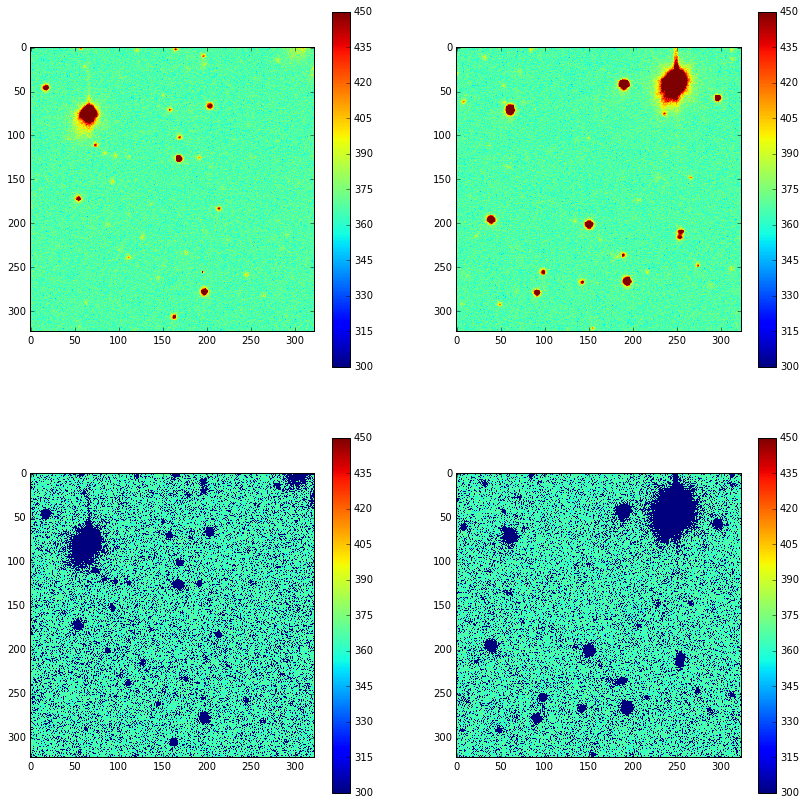

In [143]:
plt.figure(figsize=(14,14))

a = 5800
b = a + coarse_bin_factor
c = 16000
d = c + coarse_bin_factor

a2 = 5800
b2 = a2 + coarse_bin_factor
c2 = 15000
d2 = c2 + coarse_bin_factor

plt.subplot(221)
plt.imshow(img[a:b,c:d],interpolation='nearest',vmin=300,vmax=450)
plt.colorbar()

plt.subplot(222)
plt.imshow(img[a2:b2,c2:d2],interpolation='nearest',vmin=300,vmax=450)
plt.colorbar()

plt.subplot(223)
plt.imshow(img[a:b,c:d]*(img[a:b,c:d]<np.percentile(img[a:b,c:d].flatten(),75)),interpolation='nearest',vmin=300,vmax=450)
plt.colorbar()

plt.subplot(224)
plt.imshow(img[a2:b2,c2:d2]*(img[a2:b2,c2:d2]<np.percentile(img[a2:b2,c2:d2].flatten(),75)),interpolation='nearest',vmin=300,vmax=450)
plt.colorbar()
# plt.imshow(mask[a:b,c:d],interpolation='nearest',vmin=0,vmax=1)
# plt.colorbar()

# plt.subplot(133)
# plt.imshow(mask2[a:b,c:d]*img[a:b,c:d],interpolation='nearest',vmin=300,vmax=450)
# plt.colorbar()

In [7]:
# imga = img[0:n_fine_max,0:n_fine_max].reshape(n_coarse,coarse_bin_factor,n_coarse,coarse_bin_factor,)
# maska = mask[0:n_fine_max,0:n_fine_max].reshape(n_coarse,coarse_bin_factor,n_coarse,coarse_bin_factor,)
# imga.shape

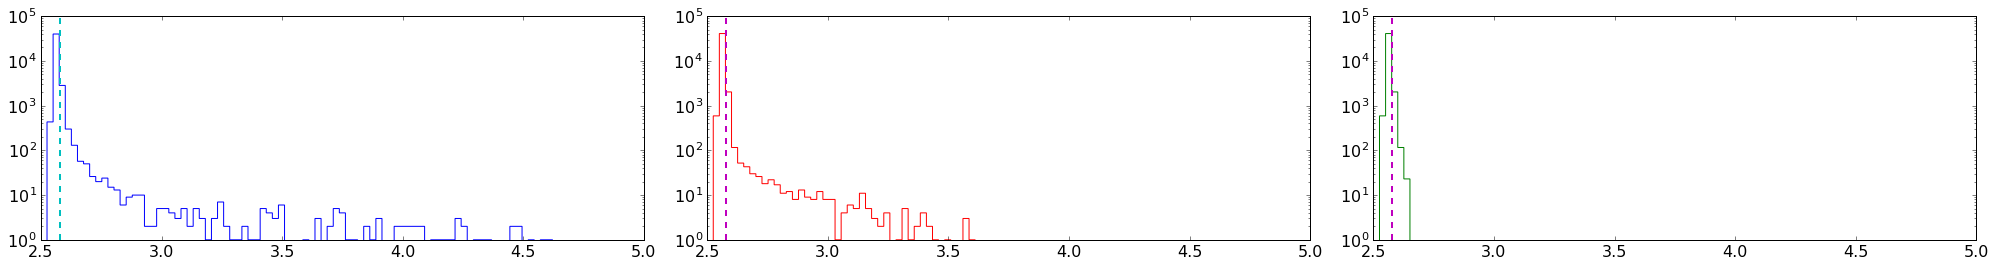

In [8]:
def pp(image,p,col):
    v = np.log10(np.percentile(image.flatten(),p))
    plt.plot([v,v],[1,1.e5],col+'--',linewidth=2)

plt.figure(figsize=(28,4))
matplotlib.rcParams.update({'font.size': 16})

bins = np.linspace(2.5,5,100)

p = 95

plt.subplot(131)
hi = plt.hist(np.log10(img[a:b,c:d]).flatten(),bins,color='blue',histtype='step')
plt.gca().set_yscale('log')
plt.xlim([2.5,5])
pp(img[a:b,c:d],p,'c')

plt.subplot(132)
hi = plt.hist(np.log10(img[a2:b2,c2:d2]).flatten(),bins,color='red',histtype='step')
plt.gca().set_yscale('log')
plt.xlim([2.5,5])
pp(img[a2:b2,c2:d2],p,'m')

plt.subplot(133)
hi = plt.hist(np.log10(img[a2:b2,c2:d2][img[a2:b2,c2:d2]<430]).flatten(),bins,color='green',histtype='step')
plt.gca().set_yscale('log')
plt.xlim([2.5,5])

pp(img[a:b,c:d],p,'c')
pp(img[a2:b2,c2:d2],p,'m')

plt.tight_layout()

In [385]:
np.mean(img[a:b,c:d])

386.65723

In [386]:
np.mean(img[a:b,c:d][img[a:b,c:d]<np.percentile(img[a:b,c:d].flatten(),p)])

367.20056

In [387]:
np.sum(img[a:b,c:d]*mask[a:b,c:d])/np.sum(mask[a:b,c:d])

368.25589

In [388]:
np.std(img[a:b,c:d].flatten()[1==mask[a:b,c:d].flatten()])

12.406334

In [389]:
np.sqrt(367.)

19.157244060668017

In [390]:
from scipy.stats import poisson,norm

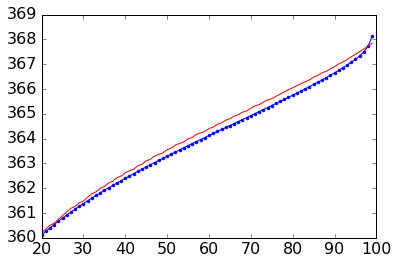

In [391]:
percentile_cuts = np.arange(20,100)
mean_after_percentile_cuts = np.zeros(len(percentile_cuts))
norm_mean_with_percentile_cuts = np.zeros(len(percentile_cuts))


mu = 368.0
sd = 5.59
xvals = np.linspace(0,500,5000)

for pi in range(len(percentile_cuts)):
    p = percentile_cuts[pi]
    mean_after_percentile_cuts[pi] = np.mean(img[a:b,c:d][img[a:b,c:d]<np.percentile(img[a:b,c:d].flatten(),p)])
    
    xmax = norm.ppf(1.*p/100,loc=mu,scale=sd)
    norm_mean_with_percentile_cuts[pi] = np.sum(norm.pdf(xvals[xvals<xmax],loc=mu,scale=sd)*xvals[xvals<xmax])/np.sum(norm.pdf(xvals[xvals<xmax],loc=mu,scale=sd))
    
plt.plot(percentile_cuts,mean_after_percentile_cuts,'.-')
plt.plot(percentile_cuts,norm_mean_with_percentile_cuts,'r')

In [392]:
iqr2std = 1./(norm.ppf(.75)-norm.ppf(.25))
sd = iqr2std*(np.percentile(img[a:b,c:d].flatten(),75)-np.percentile(img[a:b,c:d].flatten(),25))
sd

5.5963618714825261

In [393]:
p0 = .75
print(np.percentile(img[a:b,c:d].flatten(),100*p0))
mu_after_cut = np.mean(img[a:b,c:d][img[a:b,c:d]<np.percentile(img[a:b,c:d].flatten(),100*p0)])
mu_after_cut

371.515678406


365.33356

In [394]:
xvals = np.linspace(350,450,500)
def mu_after_cut_as_as_function_of_mu(mutrue):
    xmax = norm.ppf(p0,loc=mutrue,scale=sd)
    g = xvals<xmax
    mu_after_cut_nominal = np.sum(xvals[g]*norm.pdf(xvals[g],loc=mutrue,scale=sd))/np.sum(norm.pdf(xvals[g],loc=mutrue,scale=sd))
    
    return (mu_after_cut-mu_after_cut_nominal)**2
mu_after_cut_as_as_function_of_mu(367.75)

0.0048864897058317949

In [395]:
from scipy.optimize import minimize

In [396]:
minimize(mu_after_cut_as_as_function_of_mu, 365, method='nelder-mead').x[0]

367.66832733154297

In [397]:
n_fine_max,coarse_bin_factor,n_coarse

(23100, 210, 110)

In [398]:
imgmed = np.median(img[img!=0])

KeyboardInterrupt: 

In [ ]:
img_binned = np.zeros((n_coarse,n_coarse))
img_binned_masked = np.zeros((n_coarse,n_coarse))

xvals = np.linspace(imgmed-100,imgmed+100,200)
def mu_after_cut_as_as_function_of_mu(mutrue,sd):
    xmax = norm.ppf(p0,loc=mutrue,scale=sd)
    g = xvals<xmax
    mu_after_cut_nominal = np.sum(xvals[g]*norm.pdf(xvals[g],loc=mutrue,scale=sd))/np.sum(norm.pdf(xvals[g],loc=mutrue,scale=sd))

    return (mu_after_cut-mu_after_cut_nominal)**2

p0 = .6

for i in range(n_coarse):
    print(1.*i/n_coarse)
    for j in range(n_coarse):
        img_in_this_coarse_bin = img[i*coarse_bin_factor:(i+1)*coarse_bin_factor,j*coarse_bin_factor:(j+1)*coarse_bin_factor]
        if np.all(img_in_this_coarse_bin==0): continue
                
        img_binned[i,j] = np.mean(img_in_this_coarse_bin)
        
        #if img_binned[i,j]>2500: print(i,j)
        
        sd = iqr2std*(np.percentile(img_in_this_coarse_bin,75)-np.percentile(img_in_this_coarse_bin,25))
        med = np.median(img_in_this_coarse_bin)
        
        mu_after_cut = np.mean(img_in_this_coarse_bin[img_in_this_coarse_bin<np.percentile(img_in_this_coarse_bin,100*p0)])
        
        mu_true_fitted = minimize(mu_after_cut_as_as_function_of_mu, med, method='nelder-mead',args=(sd)).x[0]
        
        img_binned_masked[i,j] = mu_true_fitted

In [ ]:
plt.figure(figsize=(28,14))

x0,x1 = 20,74
y0,y1 = 83,136

# x0,x1 = 0,n_coarse
# y0,y1 = 0,n_coarse

plt.subplot(121)
plt.imshow(img_binned[x0:x1,y0:y1],interpolation='nearest')
plt.colorbar()

plt.subplot(122)
plt.imshow(img_binned_masked[x0:x1,y0:y1],interpolation='nearest')
plt.colorbar()

In [92]:
i,j = 29,124
# i,j = 60,106
img_in_this_coarse_bin = img[i*coarse_bin_factor:(i+1)*coarse_bin_factor,j*coarse_bin_factor:(j+1)*coarse_bin_factor]

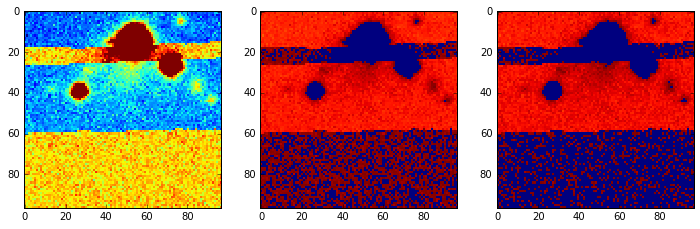

In [93]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(img_in_this_coarse_bin,interpolation='nearest',vmin=300,vmax=400)

plt.subplot(132)
plt.imshow(img_in_this_coarse_bin*(img_in_this_coarse_bin<np.percentile(img_in_this_coarse_bin,75)),interpolation='nearest')

plt.subplot(133)
plt.imshow(img_in_this_coarse_bin*(img_in_this_coarse_bin<np.percentile(img_in_this_coarse_bin,60)),interpolation='nearest')

In [149]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

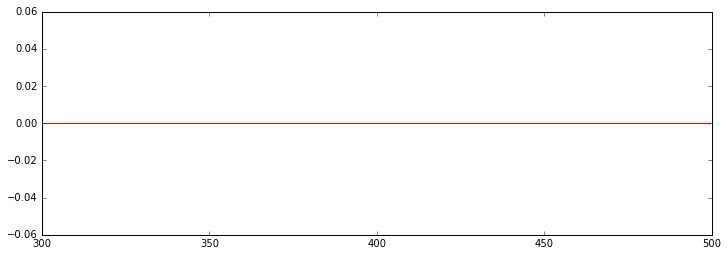

In [150]:
plt.figure(figsize=(12,4))
counts,binedges = np.histogram(img_in_this_coarse_bin.flatten(),linspace(300,500,300))
bins = .5*(binedges[1:]+binedges[:-1])
plt.plot(bins,counts)
plt.plot(bins,gauss(bins,np.max(counts),np.median(img_in_this_coarse_bin),10),'r-')

In [146]:
from scipy.optimize import curve_fit
#g = bins<np.max(bins[np.where(counts>np.max(counts)/2)[0]])
# g = bins<bins[np.argmax(counts)]
g = (bins<np.max(bins[np.where(counts>np.max(counts)*.35)[0]]))|(bins<bins[np.argmax(counts)])
coeff, var_matrix = curve_fit(gauss, bins[g], counts[g], p0=[np.max(counts),np.median(img_in_this_coarse_bin),10])

0.0

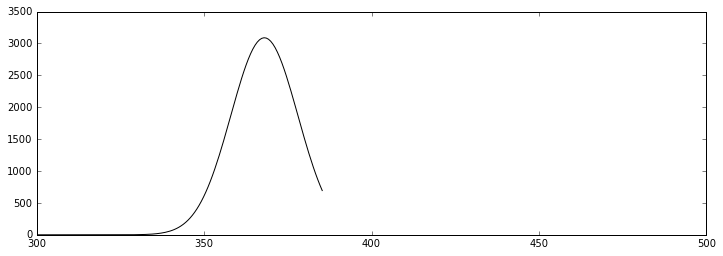

In [151]:
plt.figure(figsize=(12,4))
plt.plot(bins,counts,'b-')
plt.plot(bins[g],gauss(bins[g],coeff[0],coeff[1],coeff[2]),'r-')
plt.plot(bins[g],gauss(bins[g],coeff[0],368.,coeff[2]),'k-')
coeff[1]

In [144]:
img_binned = np.zeros((n_coarse,n_coarse))
img_binned_masked = np.zeros((n_coarse,n_coarse))

bins = np.linspace(300,500,300)
for i in range(n_coarse):
    print(1.*i/n_coarse)
    for j in range(n_coarse):
        img_in_this_coarse_bin = img[i*coarse_bin_factor:(i+1)*coarse_bin_factor,j*coarse_bin_factor:(j+1)*coarse_bin_factor]
        if not np.all(img_in_this_coarse_bin>300): continue
        
        img_binned[i,j] = np.mean(img_in_this_coarse_bin)
                
        counts,binedges = np.histogram(img_in_this_coarse_bin.flatten(),binedges)
        bins = .5*(binedges[1:]+binedges[:-1])

        g = (bins<np.max(bins[np.where(counts>np.max(counts)*.35)[0]]))|(bins<bins[np.argmax(counts)])
        #g = bins<bins[np.argmax(counts)]
        
        try:
            coeff, var_matrix = curve_fit(gauss, bins[g], counts[g], p0=[np.max(counts),np.median(img_in_this_coarse_bin),10])
            img_binned_masked[i,j] = coeff[1]
        except:
            pass

0.0
0.0140845070423
0.0281690140845
0.0422535211268
0.056338028169
0.0704225352113
0.0845070422535
0.0985915492958
0.112676056338
0.12676056338
0.140845070423
0.154929577465
0.169014084507
0.183098591549
0.197183098592
0.211267605634
0.225352112676
0.239436619718
0.253521126761
0.267605633803
0.281690140845
0.295774647887
0.30985915493
0.323943661972
0.338028169014
0.352112676056
0.366197183099
0.380281690141
0.394366197183
0.408450704225
0.422535211268
0.43661971831
0.450704225352
0.464788732394
0.478873239437
0.492957746479
0.507042253521
0.521126760563
0.535211267606
0.549295774648
0.56338028169
0.577464788732
0.591549295775
0.605633802817
0.619718309859
0.633802816901
0.647887323944
0.661971830986
0.676056338028
0.69014084507
0.704225352113
0.718309859155
0.732394366197
0.746478873239
0.760563380282
0.774647887324
0.788732394366
0.802816901408
0.816901408451
0.830985915493
0.845070422535
0.859154929577
0.87323943662
0.887323943662
0.901408450704
0.915492957746
0.929577464789
0.9436

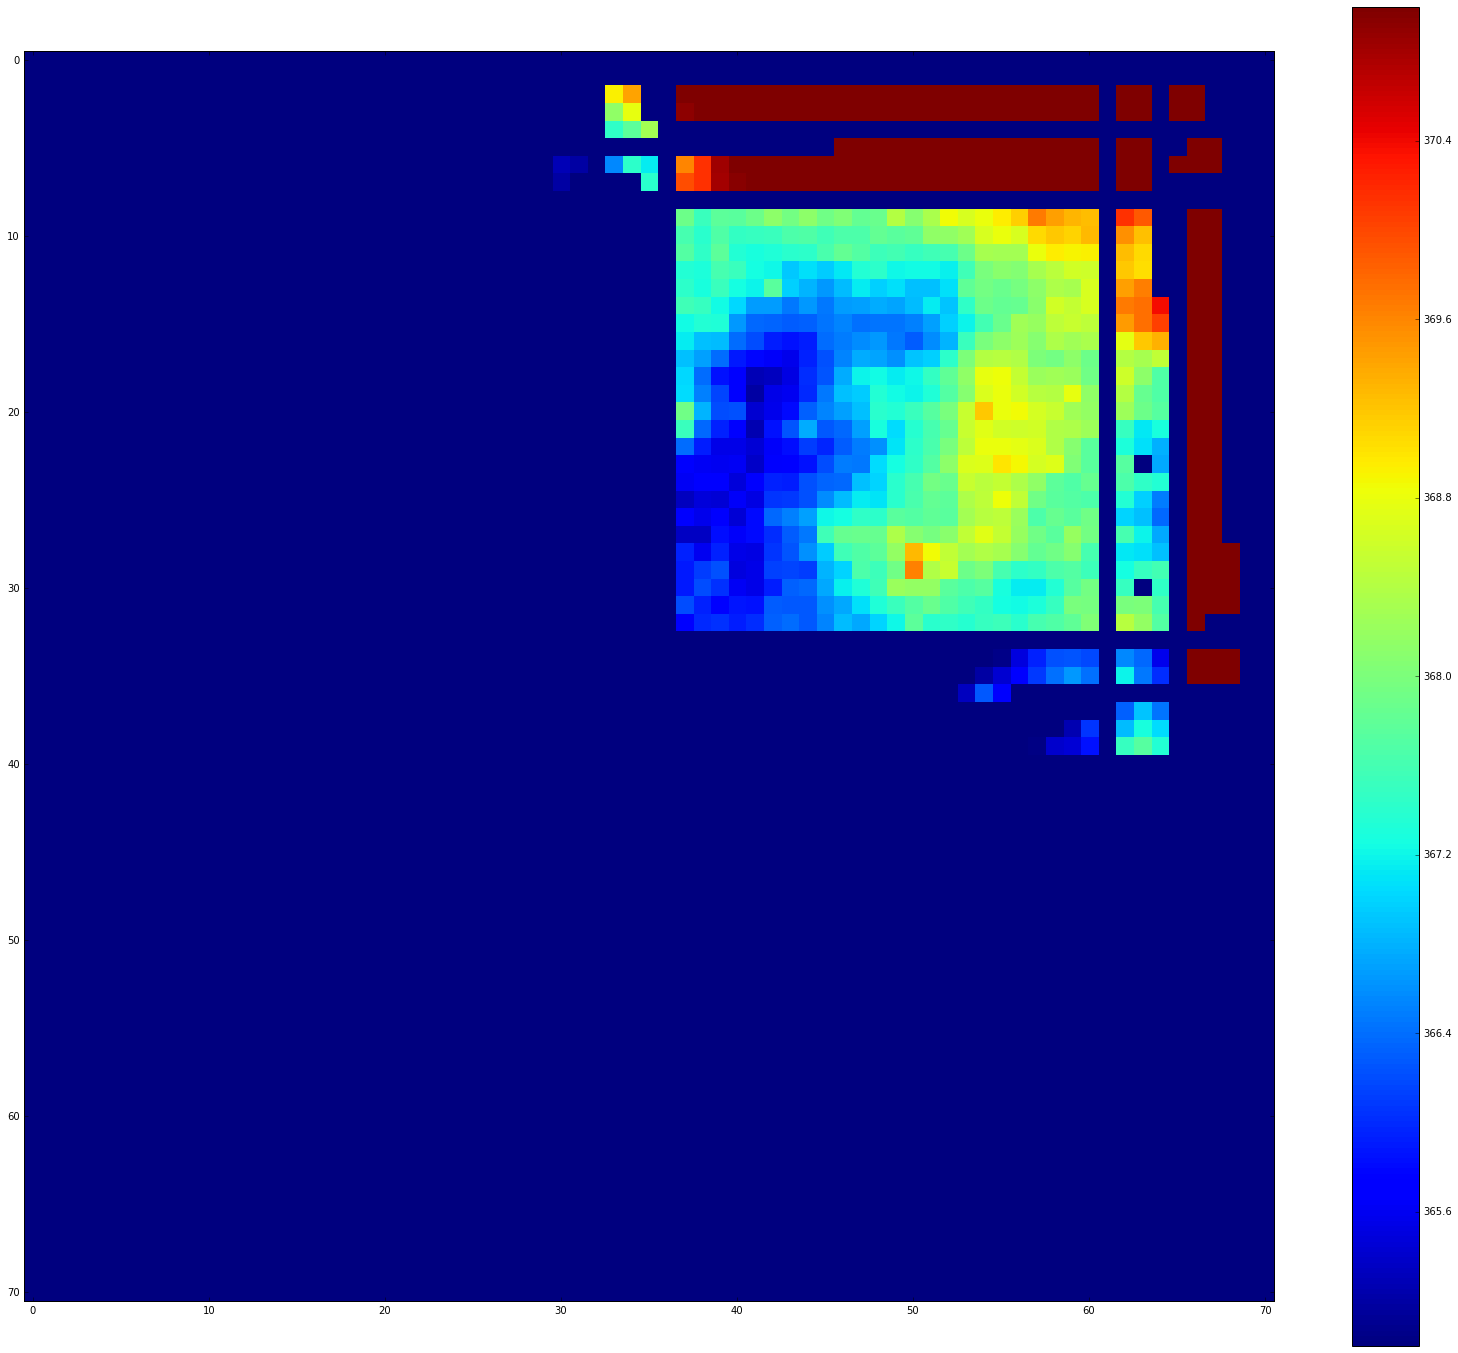

In [145]:
plt.figure(figsize=(28,24))

# x0,x1 = 13,54
# y0,y1 = 53,95
x0,x1 = 0,n_coarse
y0,y1 = 0,n_coarse

plt.imshow(img_binned_masked[x0:x1,y0:y1],interpolation='nearest',vmin=365,vmax=371)
plt.colorbar()